**Importing Libraries**

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn.model_selection import train_test_split
from numpy import asarray
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
import math

**Reading Data**

In [34]:
path='./data_for_dm_assignment_kanpur.csv'
df=pd.read_csv(path)

In [35]:
df

,date,pm25,pm10,o3,no2,so2,co
0,2022/4/1,158.0,90.0,25.0,NaN,21.0,10.0
1,2022/4/2,145.0,144.0,27.0,NaN,10.0,11.0
2,2022/4/3,155.0,129.0,21.0,NaN,24.0,12.0
3,2022/4/4,152.0,92.0,28.0,NaN,22.0,14.0
4,2022/4/5,145.0,64.0,26.0,NaN,15.0,11.0
5,2022/4/6,110.0,85.0,21.0,NaN,25.0,17.0
6,2022/4/7,141.0,75.0,20.0,NaN,20.0,19.0
7,2022/4/8,130.0,89.0,24.0,NaN,27.0,20.0
8,2022/4/9,141.0,107.0,28.0,NaN,22.0,20.0
9,2022/4/10,151.0,87.0,24.0,NaN,18.0,19.0


**Removing data before 2019-01**

In [36]:
df['date'] = pd.to_datetime(df['date'])
df

,date,pm25,pm10,o3,no2,so2,co
0,2022-04-01,158.0,90.0,25.0,NaN,21.0,10.0
1,2022-04-02,145.0,144.0,27.0,NaN,10.0,11.0
2,2022-04-03,155.0,129.0,21.0,NaN,24.0,12.0
3,2022-04-04,152.0,92.0,28.0,NaN,22.0,14.0
4,2022-04-05,145.0,64.0,26.0,NaN,15.0,11.0
5,2022-04-06,110.0,85.0,21.0,NaN,25.0,17.0
6,2022-04-07,141.0,75.0,20.0,NaN,20.0,19.0
7,2022-04-08,130.0,89.0,24.0,NaN,27.0,20.0
8,2022-04-09,141.0,107.0,28.0,NaN,22.0,20.0
9,2022-04-10,151.0,87.0,24.0,NaN,18.0,19.0


**Sorting rows based on date column**

In [37]:
df.columns
df=df.sort_values(by=['date'])
df=df.reset_index(drop=True)
df

,date,pm25,pm10,o3,no2,so2,co
0,2014-06-29,NaN,NaN,7.0,22.0,NaN,10.0
1,2014-06-30,NaN,31.0,25.0,18.0,NaN,8.0
2,2014-07-01,NaN,45.0,NaN,NaN,NaN,NaN
3,2014-07-13,NaN,NaN,NaN,17.0,NaN,10.0
4,2014-07-14,NaN,49.0,NaN,NaN,NaN,NaN
5,2014-07-15,NaN,NaN,14.0,13.0,NaN,7.0
6,2014-07-16,NaN,44.0,NaN,NaN,NaN,NaN
7,2014-09-15,NaN,NaN,16.0,17.0,NaN,NaN
8,2014-09-16,NaN,82.0,10.0,19.0,NaN,NaN
9,2014-09-17,NaN,85.0,13.0,16.0,NaN,NaN


**Data Preprocessing**
1. There are columns with empty values or empty string values.
2. Converted all columns except 'date' column to numeric data type.
3. Columns with empty values or empty string values are replaced by the mean of the column, why we have not decided to make them as zero because, it results in incorrect training , hence replacing with average of the column does not affect training in any way.

In [38]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [39]:
df[['pm25','pm10','o3','no2','so2','co']]=df[['pm25','pm10','o3','no2','so2','co']].apply(pd.to_numeric,errors='coerce')
df['pm25'].fillna(df['pm25'].mean(skipna=True),inplace=True)
df['pm10'].fillna(df['pm10'].mean(skipna=True),inplace=True)
df['o3'].fillna(df['o3'].mean(skipna=True),inplace=True)
df['no2'].fillna(df['no2'].mean(skipna=True),inplace=True)
df['so2'].fillna(df['so2'].mean(skipna=True),inplace=True)
df['co'].fillna(df['co'].mean(skipna=True),inplace=True)

**AQI table**
1. Following I am making a dictionary which is actually a table for breakdown points for different pollutants like CO, NO2, O3 and thresholds for AQI (Air Quality Index) and AQI bucket threshholds i.e the term to say whether the AQI is good,satisfactory etc.1. 

In [40]:
Indices_table={}
Indices_table["AQI_Category"]=["Good","Satisfactory","Moderately_polluted","Poor","Very Poor","Severe"]
Indices_table["AQI"]=[[0,50],[51,100],[101,200],[201,300],[301,400],[401,500]]
Indices_table["pm10"]=[[0,50],[51,100],[101,250],[251,350],[351,430],[431,float("infinity")]]
Indices_table["pm25"]=[[0,30],[31,60],[61,90],[91,120],[121,250],[250.1,float("infinity")]]
Indices_table["no2"]=[[0,40],[41,80],[81,180],[181,280],[281,400],[400.1,float("infinity")]]
Indices_table["o3"]=[[0,50],[51,100],[101,168],[169,208],[209,748],[748.1,float("infinity")]]
Indices_table["co"]=[[0,1.0],[1.1,2.0],[2.1,10],[10,17],[17,34],[34.1,float("infinity")]]
Indices_table["s02"]=[[0,40],[41,80],[81,380],[381,800],[801,1600],[1600.1,float("infinity")]]
Indices_table["nh3"]=[[0,200],[201,400],[401,800],[801,1200],[1200,1800],[1800.1,float("infinity")]]
Indices_table["pb"]=[[0,0.5],[0.5,1.0],[1.1,2.0],[2.1,3.0],[3.1,3.5],[3.51,float("infinity")]]

Buckets=["Good","Satisfactory","Moderately Polluted","Poor","Very Poor","Severe"]


**Computing AQI from the available pollutants and adding AQI and AQI Bucket as a new column**
1. In the following code, a new column AQI and AQI_bucket is added to the dataframe. AQI is calculated by taking the formula given by Indian Standards

In [48]:

def calculate_aqi(row):
  #pm2.5
  pm25=math.ceil(row['pm25'])
  pm10=math.ceil(row['pm10'])
  o3=math.ceil(row['o3'])
  no2=math.ceil(row['no2'])
  co=math.ceil(row['co'])
  
  p=max(pm25,pm10,o3,no2,co)
  bucket=''
  aqi=Indices_table["AQI"]
  for k in range(0,len(Indices_table["AQI_Category"])):
    if(p>=aqi[k][0] and p<=aqi[k][1]):
      bucket=Buckets[k]
      break
  return p,bucket


In [49]:
c=[]
buckets=[]
for index,row in df.iterrows():
    aqi,bucket=calculate_aqi(row)
    c.append(aqi)
    buckets.append(bucket)
df["aqi"]=c
df["aqi_bucket"]=buckets

In [46]:
df

,date,pm25,pm10,o3,no2,so2,co,aqi,aqi_bucket
0,2014-06-29,173.171645,109.252174,7.000000,22.000000,6.314001,10.000000,173,Moderately Polluted
1,2014-06-30,173.171645,31.000000,25.000000,18.000000,6.314001,8.000000,173,Moderately Polluted
2,2014-07-01,173.171645,45.000000,17.271222,28.467183,6.314001,21.001153,173,Moderately Polluted
3,2014-07-13,173.171645,109.252174,17.271222,17.000000,6.314001,10.000000,173,Moderately Polluted
4,2014-07-14,173.171645,49.000000,17.271222,28.467183,6.314001,21.001153,173,Moderately Polluted
5,2014-07-15,173.171645,109.252174,14.000000,13.000000,6.314001,7.000000,173,Moderately Polluted
6,2014-07-16,173.171645,44.000000,17.271222,28.467183,6.314001,21.001153,173,Moderately Polluted
7,2014-09-15,173.171645,109.252174,16.000000,17.000000,6.314001,21.001153,173,Moderately Polluted
8,2014-09-16,173.171645,82.000000,10.000000,19.000000,6.314001,21.001153,173,Moderately Polluted
9,2014-09-17,173.171645,85.000000,13.000000,16.000000,6.314001,21.001153,173,Moderately Polluted


**Now Time series forecasting process starts**(We are proceeding according to the steps mentioned below)
1. First we will define a function which transforms given time series data into a supervised learning dataset
2. Then we will train the data with the randome forest regressor
3. Test the model



In [50]:
df.shape

(2552, 9)

In [51]:
df.values

array([[Timestamp('2014-06-29 00:00:00'), 173.17164511814534,
        109.25217391304348, ..., 10.0, 174, 'Moderately Polluted'],
       [Timestamp('2014-06-30 00:00:00'), 173.17164511814534, 31.0, ...,
        8.0, 174, 'Moderately Polluted'],
       [Timestamp('2014-07-01 00:00:00'), 173.17164511814534, 45.0, ...,
        21.001153402537486, 174, 'Moderately Polluted'],
       ...,
       [Timestamp('2022-04-14 00:00:00'), 141.0, 86.0, ..., 10.0, 141,
        'Moderately Polluted'],
       [Timestamp('2022-04-15 00:00:00'), 148.0, 84.0, ..., 21.0, 148,
        'Moderately Polluted'],
       [Timestamp('2022-04-16 00:00:00'), 155.0, 109.25217391304348, ...,
        21.001153402537486, 155, 'Moderately Polluted']], dtype=object)

**Below is the function which converts data into supervised learning dataset**

In [53]:
def convert_into_supervised(series:pd.DataFrame,dropnan=1):
    n_vars = 1 if type(series) is list else series.shape[1]
    n_vars=n_vars-3
    df1 = DataFrame(series)
    df1=df1.drop(df1.columns[[0,7,8]],axis=1)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(1, 0, -1):
        cols.append(df1.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, 1):
        cols.append(df1.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    #put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
    

In [54]:
s=convert_into_supervised(df.values)
s1=DataFrame(s)
print(s1.columns)

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)',
       'var6(t)'],
      dtype='object')


In [55]:
s1

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,173.172,109.252,7,22,6.314,10,173.172,31,25,18,6.314,8
2,173.172,31,25,18,6.314,8,173.172,45,17.2712,28.4672,6.314,21.0012
3,173.172,45,17.2712,28.4672,6.314,21.0012,173.172,109.252,17.2712,17,6.314,10
4,173.172,109.252,17.2712,17,6.314,10,173.172,49,17.2712,28.4672,6.314,21.0012
5,173.172,49,17.2712,28.4672,6.314,21.0012,173.172,109.252,14,13,6.314,7
6,173.172,109.252,14,13,6.314,7,173.172,44,17.2712,28.4672,6.314,21.0012
7,173.172,44,17.2712,28.4672,6.314,21.0012,173.172,109.252,16,17,6.314,21.0012
8,173.172,109.252,16,17,6.314,21.0012,173.172,82,10,19,6.314,21.0012
9,173.172,82,10,19,6.314,21.0012,173.172,85,13,16,6.314,21.0012
10,173.172,85,13,16,6.314,21.0012,173.172,88,13,21,6.314,21.0012


In [56]:
def random_forest_forecast(hist,X_train,Y_train,testX):
    # transform list into array
    
    # split into input and output columns
    trainX, trainy = X_train,Y_train
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

In [57]:
def walk_forward_validation(data):
    predictions = list()
    # split dataset
    X=[]
    Y=[]
    train=[]
    test=[]
    count=0
    for index,row in data.iterrows():
        temp_input=[]
        temp=[]
        temp1=[]
        for j in range(0,6,1):
            temp_input.append(row[j])
            temp.append(row[j])
        temp_output=[]
        for j in range(6,12,1):
            temp_output.append(row[j])
            temp.append(row[j])
        X.append(temp_input)
        Y.append(temp_output)
        train.append(temp)
    print("success")
    X=np.array(X)
    Y=np.array(Y)
    X_train=X[:1551]
    Y_train=Y[:1551]
    X_test=X[1551:]
    Y_test=Y[1551:]
    test=train[1551:]
    train=train[:1551]
    
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    
    actual_aqi=[]    
    for i in range(0,1000):
        # split test row into input and output columns
        testX, testy = X_test[i],Y_test[i]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history,X_train,Y_train,testX)
        # store forecast in list of predictions
        row={}
        row['pm25']=yhat[0]
        row['pm10']=yhat[1]
        row['o3']=yhat[2]
        row['no2']=yhat[3]
        row['so2']=yhat[4]
        row['co']=yhat[5]
        predicted_aqi,bucket=calculate_aqi(row)
        print(i)
        predictions.append(predicted_aqi)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        row={}
        row['pm25']=testy[0]
        row['pm10']=testy[1]
        row['o3']=testy[2]
        row['no2']=testy[3]
        row['so2']=testy[4]
        row['co']=testy[5]
        actual,bucket=calculate_aqi(row)
        print(i)
        actual_aqi.append(actual)
        
    predictions=np.array(predictions)
    actual=np.array(actual_aqi)
    # estimate prediction error
    error = mean_absolute_error(actual, predictions)
    return error, actual, predictions

In [58]:
mae, y, yhat = walk_forward_validation(s)


success
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
110
110
111
111
112
112
113
113
114
114
115
115
116
116
117
117
118
118
119
119
120
120
121
121
122
122
123
123
124
124
125
125
126
126
127
127
128
128
129
129
130
130
131
131
132
132
133
133
134
134
135
135
136
136
137
137
138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
147
147
148
148
149
149
150
150
151


In [59]:
mae

22.398

MAE: 22.398


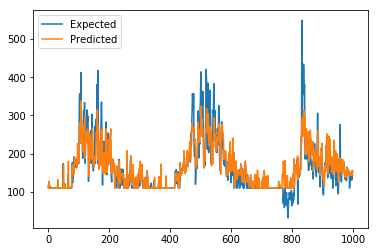

In [60]:
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

**Following is the function which does the training**

In [ ]:
df.columns

In [ ]:
trainer(df[["aqi"]])